In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error



from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

In [5]:
# Load data and take a random sample with directly declared parameters
df = pd.read_csv("C:/Users/Aneesa/Downloads/Transactions.csv").sample(frac=0.05, random_state=0)

In [7]:
# Names of columns to be retained
cols = [
    'has_parking',
    'meter_sale_price',
    'no_of_parties_role_1',
    'no_of_parties_role_2',
    'no_of_parties_role_3',
    'procedure_area',
    'property_type_en',
    'property_sub_type_en',
    'reg_type_en',
    'property_usage_en',
    'rooms_en',
    'trans_group_en',
    'actual_worth'
]

In [9]:
# Select the columns of interest and drop the rest
df = df[cols]

df.shape

(66990, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66990 entries, 516030 to 473205
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   has_parking           66990 non-null  int64  
 1   meter_sale_price      66990 non-null  float64
 2   no_of_parties_role_1  66942 non-null  float64
 3   no_of_parties_role_2  66942 non-null  float64
 4   no_of_parties_role_3  66942 non-null  float64
 5   procedure_area        66990 non-null  float64
 6   property_type_en      66990 non-null  object 
 7   property_sub_type_en  52468 non-null  object 
 8   reg_type_en           66990 non-null  object 
 9   property_usage_en     66990 non-null  object 
 10  rooms_en              51517 non-null  object 
 11  trans_group_en        66990 non-null  object 
 12  actual_worth          66990 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 7.2+ MB


In [13]:
(df.isnull().sum() / len(df)) * 100

has_parking              0.000000
meter_sale_price         0.000000
no_of_parties_role_1     0.071652
no_of_parties_role_2     0.071652
no_of_parties_role_3     0.071652
procedure_area           0.000000
property_type_en         0.000000
property_sub_type_en    21.677862
reg_type_en              0.000000
property_usage_en        0.000000
rooms_en                23.097477
trans_group_en           0.000000
actual_worth             0.000000
dtype: float64

In [21]:
df.dtypes

has_parking               int64
meter_sale_price        float64
no_of_parties_role_1    float64
no_of_parties_role_2    float64
no_of_parties_role_3    float64
procedure_area          float64
property_type_en         object
property_sub_type_en     object
reg_type_en              object
property_usage_en        object
rooms_en                 object
trans_group_en           object
actual_worth            float64
dtype: object

In [25]:
df.describe()

,has_parking,meter_sale_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3,procedure_area,actual_worth
count,66990.000000,6.699000e+04,66942.000000,66942.000000,66942.000000,6.699000e+04,6.699000e+04
mean,0.639185,1.424670e+04,1.261540,1.187371,0.130232,1.056775e+03,4.087553e+06
std,0.480241,1.056099e+05,3.224997,0.510753,0.575289,9.430636e+04,6.550264e+07
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000e-02,1.000000e+00
25%,0.000000,6.740820e+03,1.000000,1.000000,0.000000,7.079000e+01,7.206670e+05
50%,1.000000,1.034053e+04,1.000000,1.000000,0.000000,1.178300e+02,1.320000e+06
75%,1.000000,1.588462e+04,1.000000,1.000000,0.000000,2.389775e+02,2.454767e+06
max,1.000000,1.109416e+07,415.000000,29.000000,12.000000,2.218277e+07,9.500000e+09


In [17]:
# Rows with missing values in both columns
mask1 = df['rooms_en'].isna() & df['property_sub_type_en'].isna()
# Rows with at least one missing value in any column
mask2 = df.isna().sum(axis=1) > 0

mask1.sum() / mask2.sum() * 100

93.58767803054714

In [19]:
df.has_parking.value_counts()


has_parking
1    42819
0    24171
Name: count, dtype: int64

In [27]:
df.property_type_en.value_counts()

property_type_en
Unit        46520
Villa       13081
Land         5636
Building     1753
Name: count, dtype: int64

In [29]:
df.property_sub_type_en.value_counts()

property_sub_type_en
Flat                  40554
Villa                  5931
Office                 3171
Hotel Apartment        1357
Shop                    687
Hotel Rooms             678
Workshop                 24
Stacked Townhouses       23
Building                 17
Store                    11
Warehouse                 9
Show Rooms                2
Clinic                    2
Sized Partition           1
Hotel                     1
Name: count, dtype: int64

In [31]:
df.reg_type_en.value_counts()

reg_type_en
Existing Properties    46123
Off-Plan Properties    20867
Name: count, dtype: int64

In [33]:
df.property_usage_en.value_counts()

property_usage_en
Residential                              56173
Commercial                                6986
Hospitality                               2052
Residential / Commercial                   712
Other                                      540
Multi-Use                                  265
Industrial                                 153
Agricultural                                52
Industrial / Commercial                     32
Storage                                     20
Industrial / Commercial / Residential        5
Name: count, dtype: int64

In [35]:
df.rooms_en.value_counts()

rooms_en
1 B/R          17185
2 B/R          12523
Studio          8766
3 B/R           7472
Office          2721
4 B/R           2196
Shop             284
5 B/R            230
PENTHOUSE         77
Single Room       36
6 B/R             15
Store             11
8 B/R              1
Name: count, dtype: int64

In [37]:
df.trans_group_en.value_counts()

trans_group_en
Sales        50411
Mortgages    14124
Gifts         2455
Name: count, dtype: int64

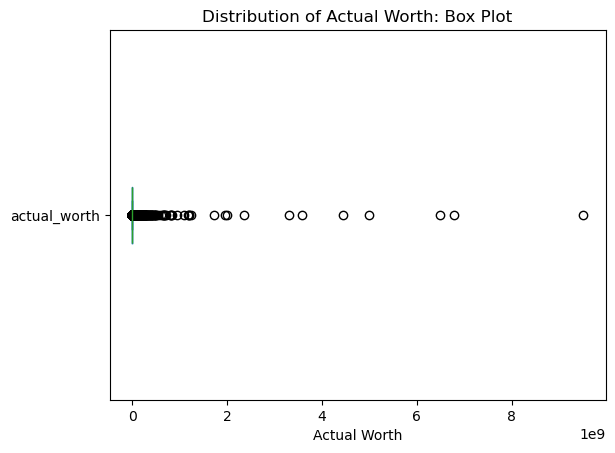

In [47]:
df["actual_worth"].plot(kind='box', vert=False)
plt.title('Distribution of Actual Worth: Box Plot')
plt.xlabel('Actual Worth');

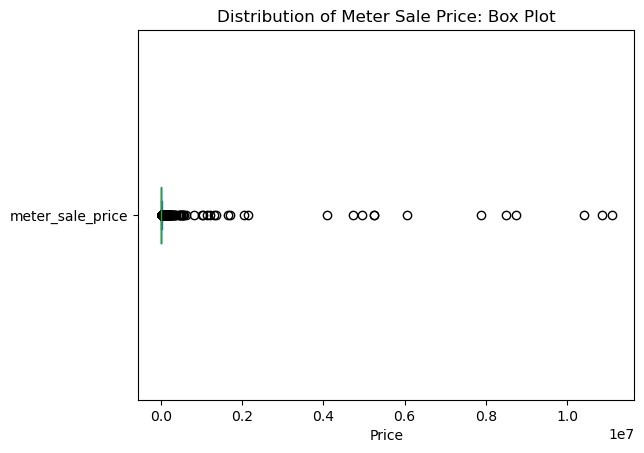

In [51]:
df["meter_sale_price"].plot(kind='box', vert=False)
plt.title('Distribution of Meter Sale Price: Box Plot')
plt.xlabel('Price');

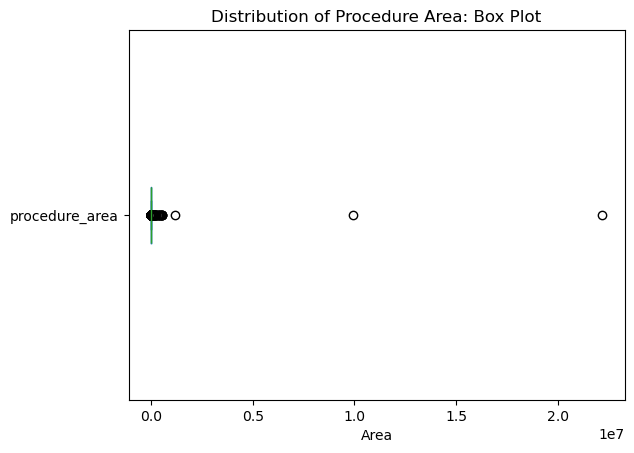

In [53]:
df["procedure_area"].plot(kind='box', vert=False)
plt.title('Distribution of Procedure Area: Box Plot')
plt.xlabel('Area');

In [55]:
# Handling outliers with IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [57]:
# Apply to numerical columns
handle_outliers(df, 'actual_worth')
handle_outliers(df, 'meter_sale_price')
handle_outliers(df, 'procedure_area')

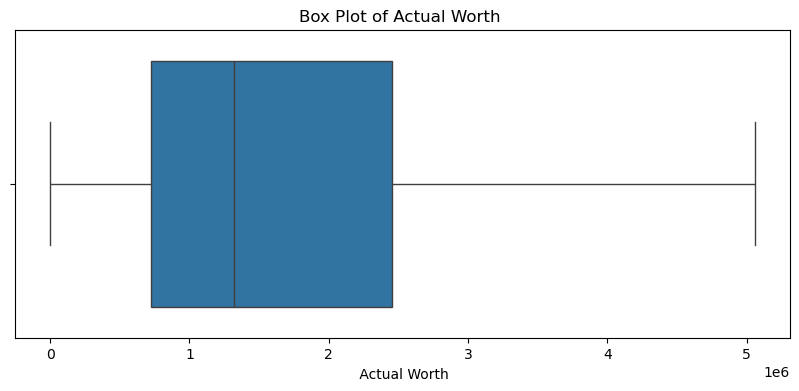

In [65]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df.actual_worth)
plt.title('Box Plot of Actual Worth ')
plt.xlabel(' Actual Worth')
plt.show()

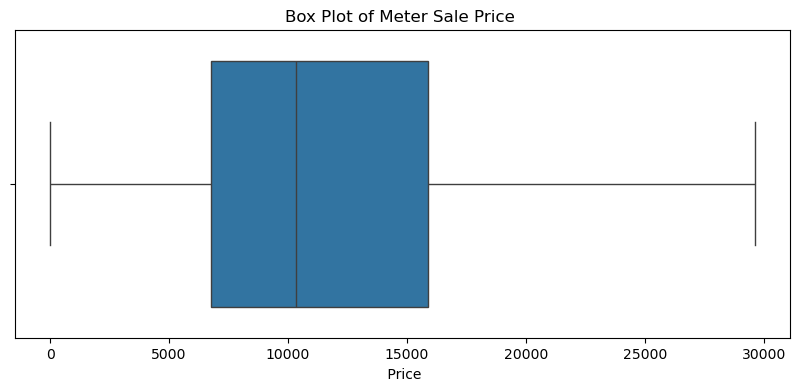

In [67]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df.meter_sale_price)
plt.title('Box Plot of Meter Sale Price ')
plt.xlabel(' Price')
plt.show()

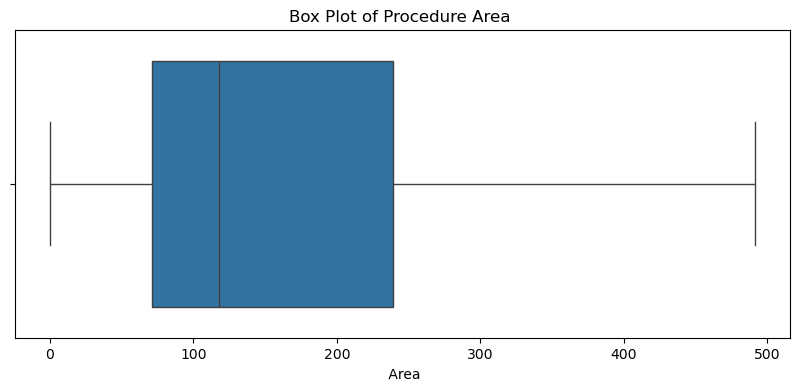

In [69]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df.procedure_area)
plt.title('Box Plot of Procedure Area ')
plt.xlabel(' Area')
plt.show()

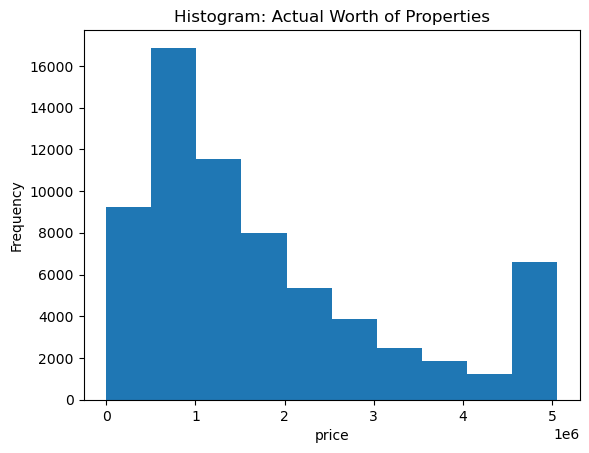

In [71]:
df.actual_worth.plot(kind='hist')
plt.xlabel('price')
plt.title('Histogram: Actual Worth of Properties');

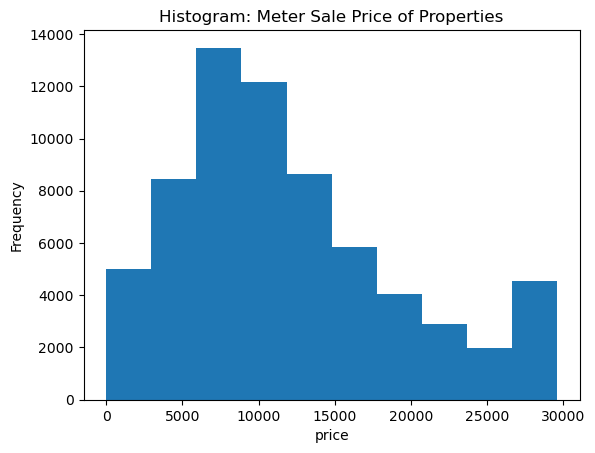

In [73]:
df.meter_sale_price.plot(kind='hist')
plt.xlabel('price')
plt.title('Histogram: Meter Sale Price of Properties');

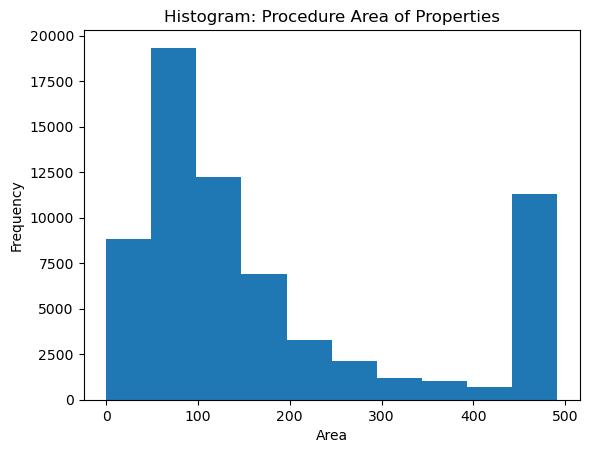

In [75]:
df.procedure_area.plot(kind='hist')
plt.xlabel('Area')
plt.title('Histogram: Procedure Area of Properties');

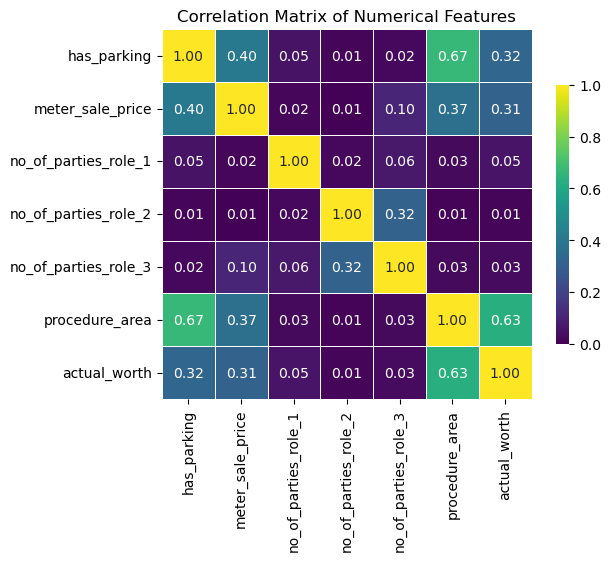

In [33]:
# Explore the absolute correlation among the features
corr = df.select_dtypes(include='number').corr().abs()
sns.heatmap(corr, vmax=1.0, vmin=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap='viridis')
plt.title('Correlation Matrix of Numerical Features')
plt.show();

In [77]:
cols_ = ['rooms_en', 'property_sub_type_en']
df[cols_] = df[cols_].replace(np.NaN, 'N/A')

In [79]:
# Drop the remaining rows containing missing values
df.dropna(axis=0, inplace=True)

In [81]:
# Confirm that there are no missing values in the dataset
assert df[df.isna().sum(axis=1) > 0].shape[0] == 0

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66942 entries, 516030 to 473205
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   has_parking           66942 non-null  int64  
 1   meter_sale_price      66942 non-null  float64
 2   no_of_parties_role_1  66942 non-null  float64
 3   no_of_parties_role_2  66942 non-null  float64
 4   no_of_parties_role_3  66942 non-null  float64
 5   procedure_area        66942 non-null  float64
 6   property_type_en      66942 non-null  object 
 7   property_sub_type_en  66942 non-null  object 
 8   reg_type_en           66942 non-null  object 
 9   property_usage_en     66942 non-null  object 
 10  rooms_en              66942 non-null  object 
 11  trans_group_en        66942 non-null  object 
 12  actual_worth          66942 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 7.2+ MB


In [85]:
(df.isnull().sum() / len(df)) * 100

has_parking             0.0
meter_sale_price        0.0
no_of_parties_role_1    0.0
no_of_parties_role_2    0.0
no_of_parties_role_3    0.0
procedure_area          0.0
property_type_en        0.0
property_sub_type_en    0.0
reg_type_en             0.0
property_usage_en       0.0
rooms_en                0.0
trans_group_en          0.0
actual_worth            0.0
dtype: float64

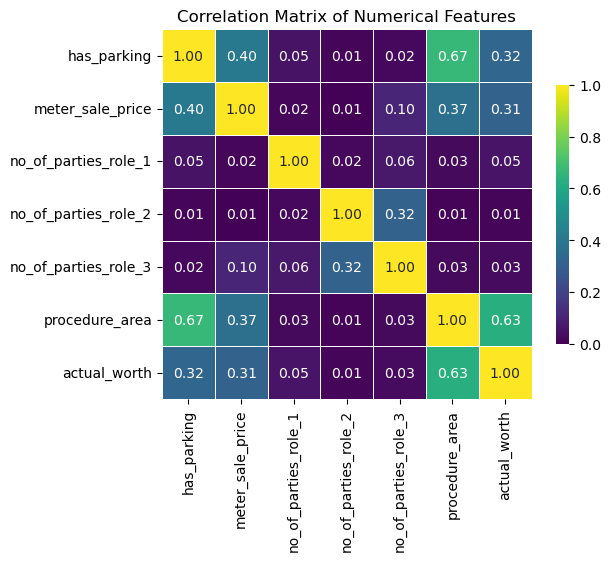

In [87]:
# Explore the absolute correlation among the features
corr = df.select_dtypes(include='number').corr().abs()
sns.heatmap(corr, vmax=1.0, vmin=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap='viridis')
plt.title('Correlation Matrix of Numerical Features')
plt.show();

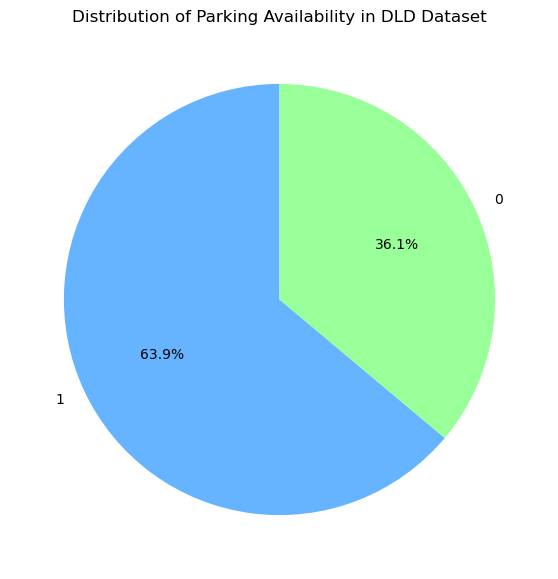

In [91]:
# Check the distribution of the 'has_parking' column
parking_counts = df['has_parking'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(parking_counts, labels=parking_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Parking Availability in DLD Dataset')
plt.show()

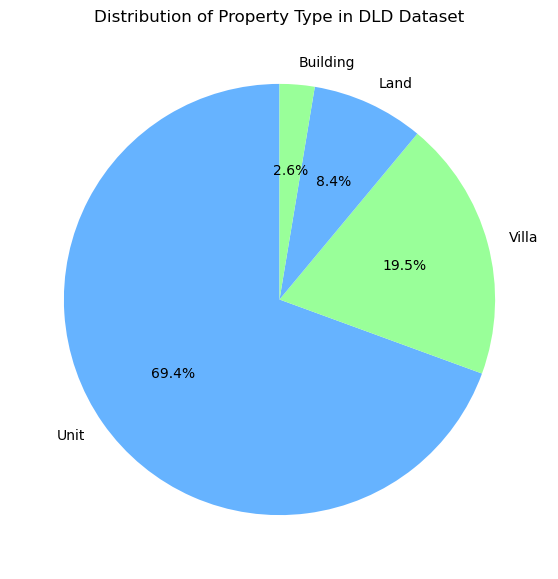

In [95]:
# Check the distribution of the 'has_parking' column
parking_counts = df['property_type_en'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(parking_counts, labels=parking_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Property Type in DLD Dataset')
plt.show()

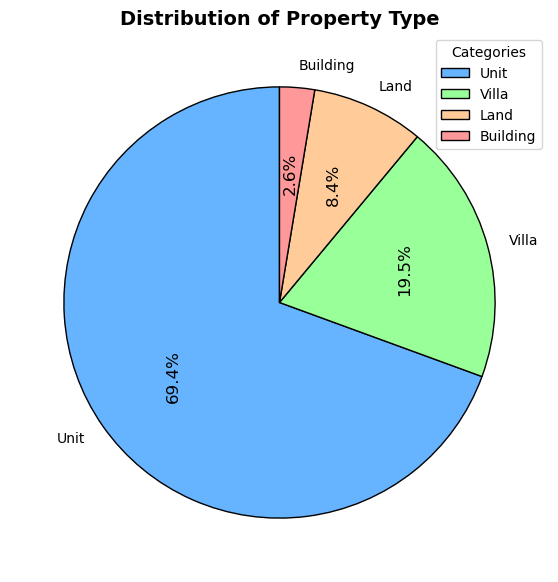

In [103]:


# Check distribution of 'has_parking' column
parking_counts = df['property_type_en'].value_counts()

# Define colors dynamically based on unique categories
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'][:len(parking_counts)]

# Create pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    parking_counts, labels=parking_counts.index, autopct='%1.1f%%', 
    startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}
)

# Rotate percentage labels vertically
for autotext in autotexts:
    autotext.set_rotation(90)  
    autotext.set_fontsize(12)

# Title & Legend
plt.title('Distribution of Property Type', fontsize=14, fontweight='bold')
plt.legend(wedges, parking_counts.index, title="Categories", loc="best")

# Show plot
plt.show()


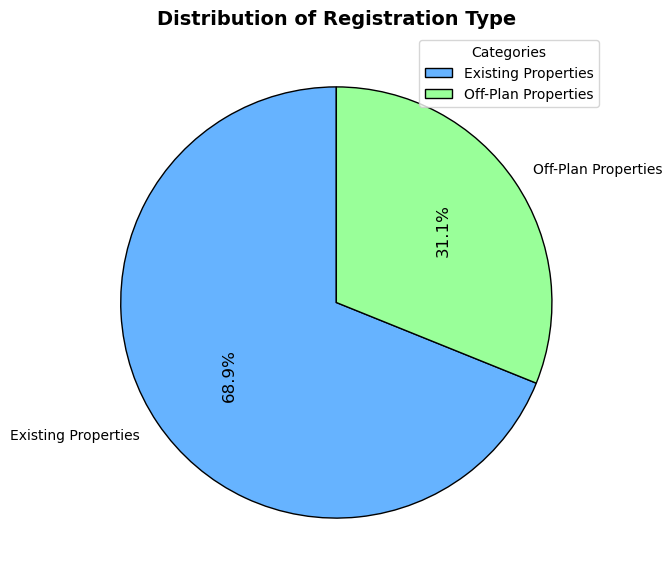

In [107]:


# Check distribution of 'has_parking' column
parking_counts = df['reg_type_en'].value_counts()

# Define colors dynamically based on unique categories
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'][:len(parking_counts)]

# Create pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    parking_counts, labels=parking_counts.index, autopct='%1.1f%%', 
    startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}
)

# Rotate percentage labels vertically
for autotext in autotexts:
    autotext.set_rotation(90)  
    autotext.set_fontsize(12)

# Title & Legend
plt.title('Distribution of Registration Type', fontsize=14, fontweight='bold')
plt.legend(wedges, parking_counts.index, title="Categories", loc="best")

# Show plot
plt.show()


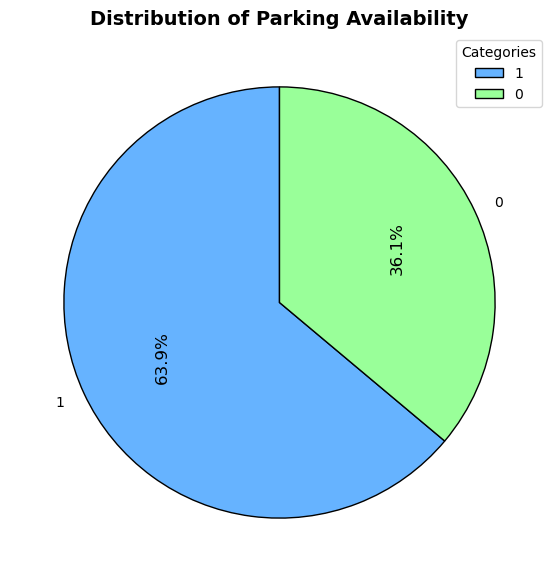

In [113]:


# Check distribution of 'has_parking' column
parking_counts = df['has_parking'].value_counts()

# Define colors dynamically based on unique categories
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'][:len(parking_counts)]

# Create pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    parking_counts, labels=parking_counts.index, autopct='%1.1f%%', 
    startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}
)

# Rotate percentage labels vertically
for autotext in autotexts:
    autotext.set_rotation(90)  
    autotext.set_fontsize(12)

# Title & Legend
plt.title('Distribution of Parking Availability', fontsize=14, fontweight='bold')
plt.legend(wedges, parking_counts.index, title="Categories", loc="best")

# Show plot
plt.show()


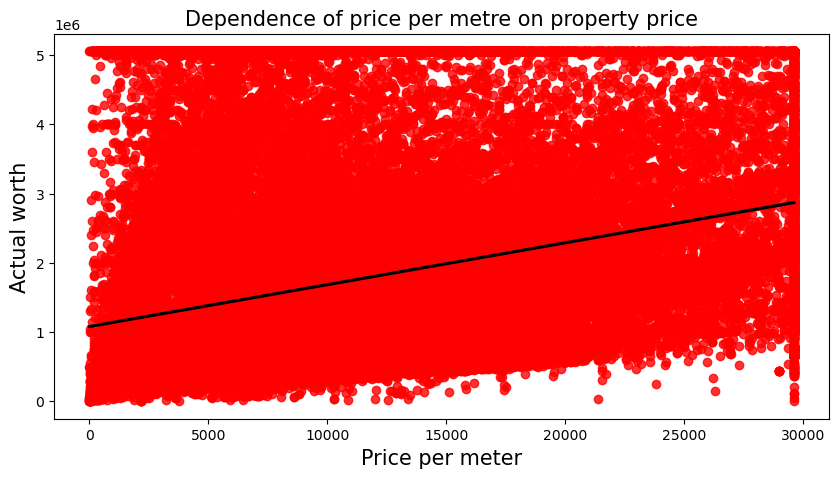

In [117]:
plt.figure(figsize=(10,5))

ax = sns.regplot(x = 'meter_sale_price' , y = 'actual_worth', data = df, fit_reg= True, scatter_kws= {'color':'red'}, line_kws={'color':'black'})
plt.title('Dependence of price per metre on property price',fontsize=15)
plt.xlabel('Price per meter',fontsize=15)
plt.ylabel('Actual worth',fontsize=15)
plt.show()

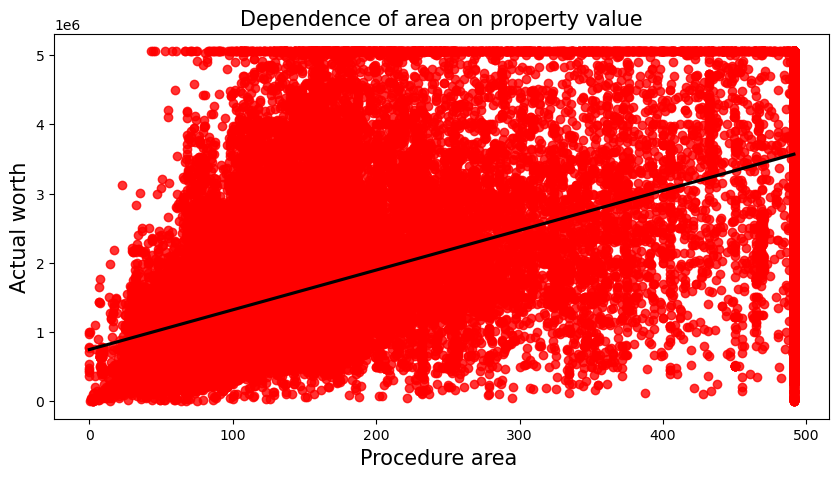

In [119]:
plt.figure(figsize=(10,5))
ax = sns.regplot(x = 'procedure_area' , y = 'actual_worth', data = df, fit_reg= True, scatter_kws= {'color':'red'}, line_kws={'color':'black'})

plt.title('Dependence of area on property value',fontsize=15)
plt.xlabel('Procedure area ',fontsize=15)
plt.ylabel('Actual worth',fontsize=15)
plt.show()

C:\Users\Aneesa\AppData\Local\Temp\ipykernel_21832\1296136366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'property_sub_type_en' , y='actual_worth', data=df, palette='viridis')


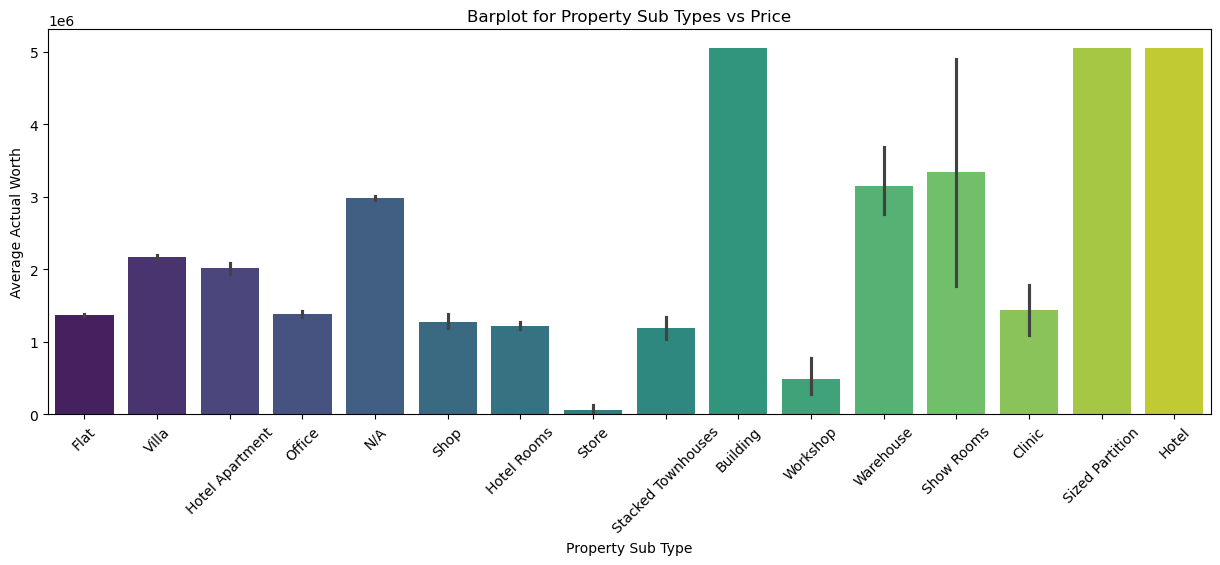

In [125]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'property_sub_type_en' , y='actual_worth', data=df, palette='viridis')
plt.title(f'Barplot for Property Sub Types vs Price')
plt.xlabel('Property Sub Type')
plt.ylabel('Average Actual Worth')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aneesa\AppData\Local\Temp\ipykernel_21832\532377403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'property_type_en' , y='actual_worth', data=df, palette='viridis')


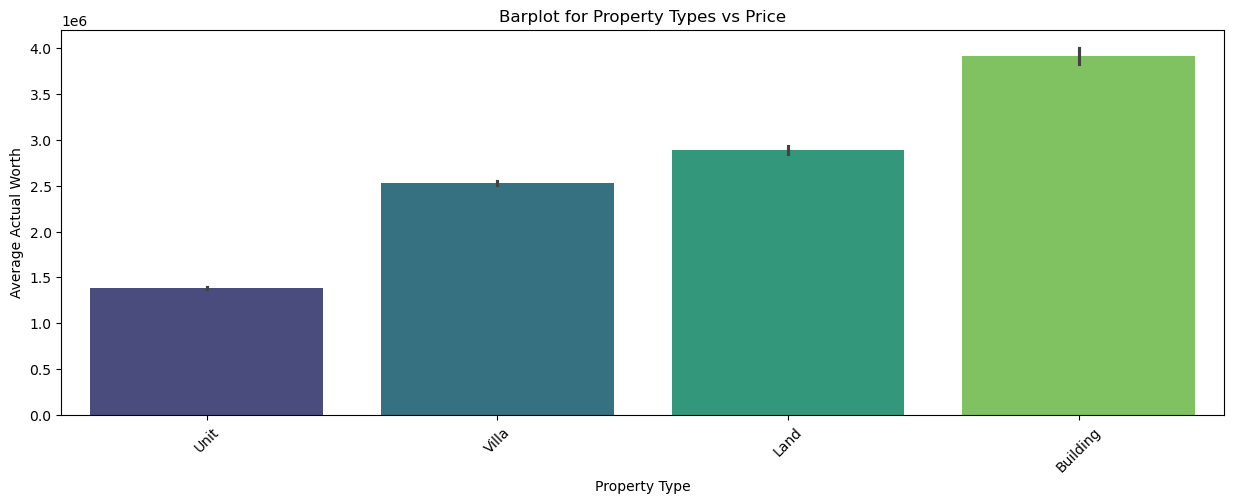

In [127]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'property_type_en' , y='actual_worth', data=df, palette='viridis')
plt.title(f'Barplot for Property Types vs Price')
plt.xlabel('Property Type')
plt.ylabel('Average Actual Worth')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aneesa\AppData\Local\Temp\ipykernel_21832\4146290571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'reg_type_en' , y='actual_worth', data=df, palette='viridis')


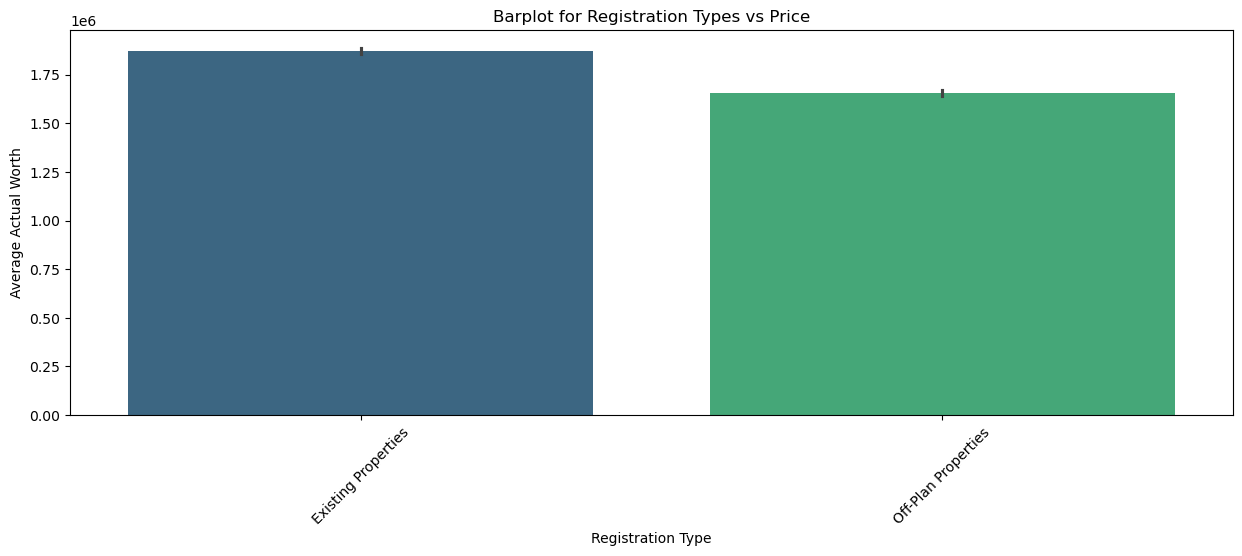

In [129]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'reg_type_en' , y='actual_worth', data=df, palette='viridis')
plt.title(f'Barplot for Registration Types vs Price')
plt.xlabel('Registration Type')
plt.ylabel('Average Actual Worth')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aneesa\AppData\Local\Temp\ipykernel_21832\2228855841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'has_parking' , y='meter_sale_price', data=df, palette='viridis')


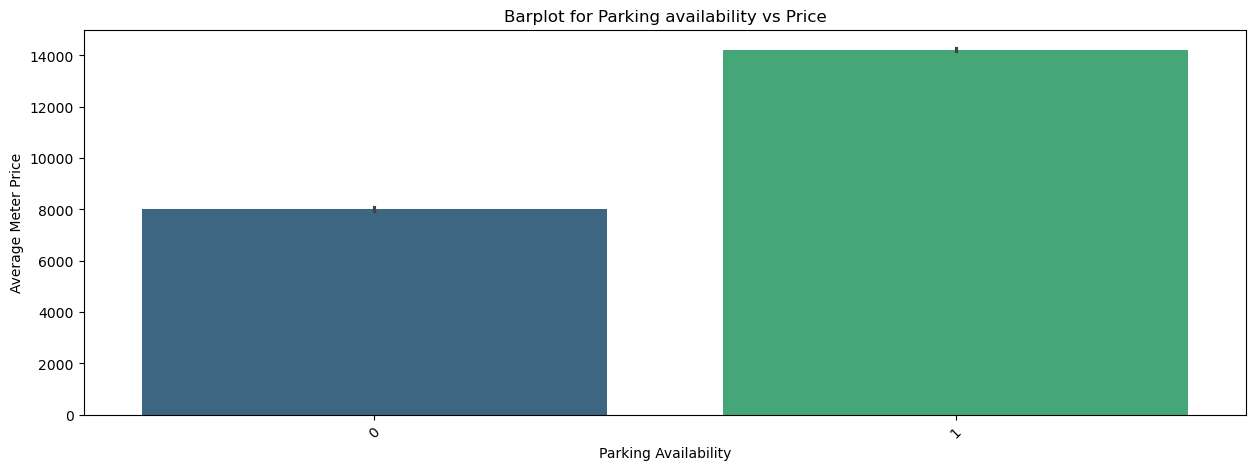

In [133]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'has_parking' , y='meter_sale_price', data=df, palette='viridis')
plt.title(f'Barplot for Parking availability vs Price')
plt.xlabel('Parking Availability')
plt.ylabel('Average Meter Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aneesa\AppData\Local\Temp\ipykernel_21832\1637071983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'property_usage_en' , y='actual_worth', data=df, palette='viridis')


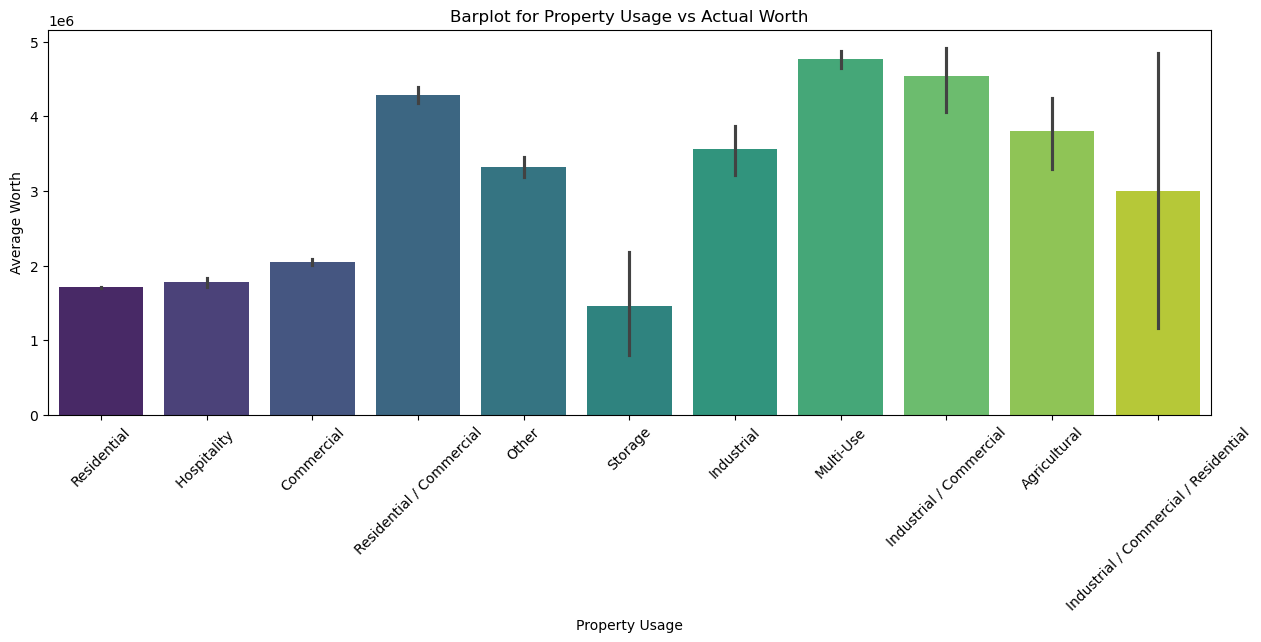

In [135]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'property_usage_en' , y='actual_worth', data=df, palette='viridis')
plt.title(f'Barplot for Property Usage vs Actual Worth')
plt.xlabel('Property Usage')
plt.ylabel('Average Worth')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aneesa\AppData\Local\Temp\ipykernel_21832\441840541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'property_usage_en' , y='meter_sale_price', data=df, palette='viridis')


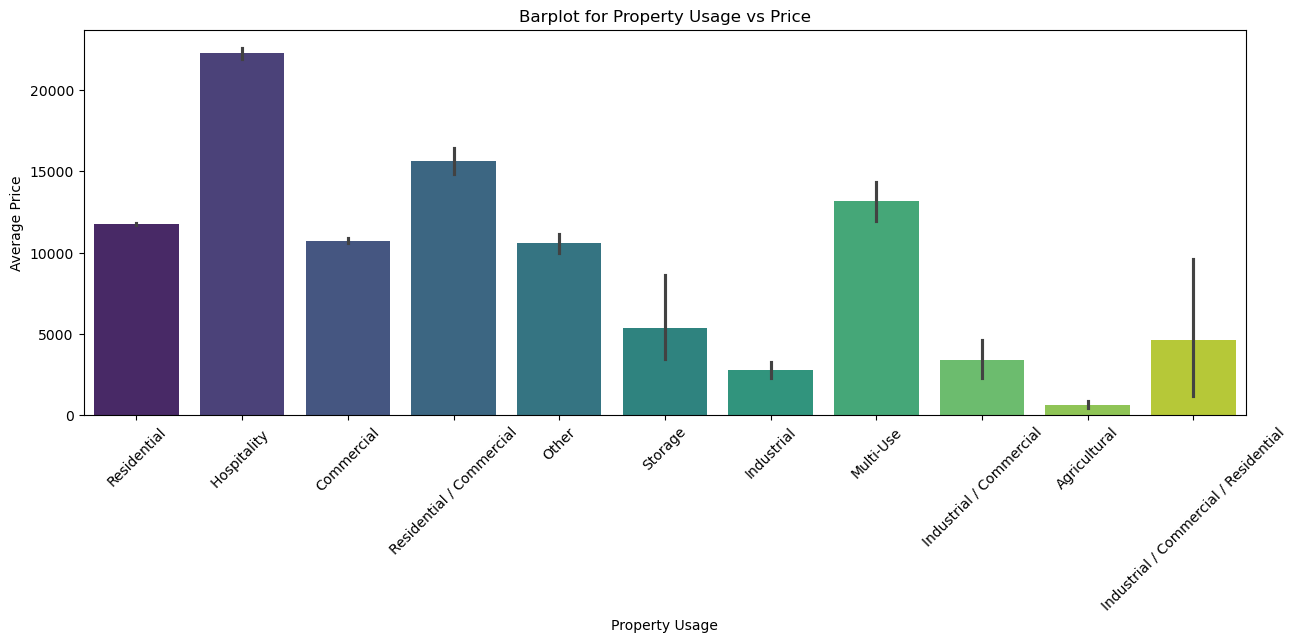

In [139]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'property_usage_en' , y='meter_sale_price', data=df, palette='viridis')
plt.title(f'Barplot for Property Usage vs Price')
plt.xlabel('Property Usage')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aneesa\AppData\Local\Temp\ipykernel_21832\629258652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'rooms_en' , y='actual_worth', data=df, palette='viridis')


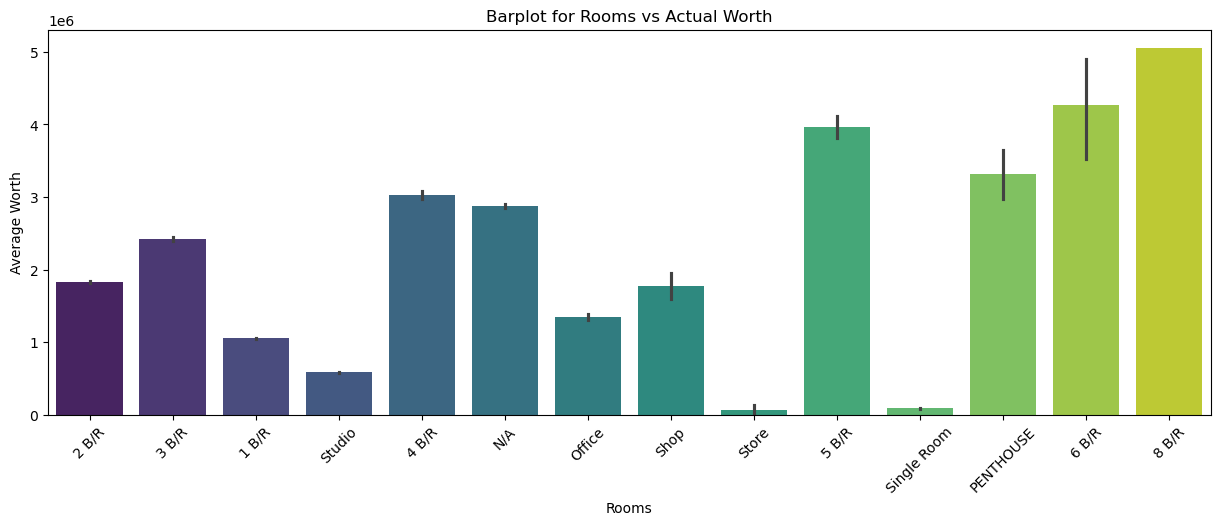

In [137]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'rooms_en' , y='actual_worth', data=df, palette='viridis')
plt.title(f'Barplot for Rooms vs Actual Worth')
plt.xlabel('Rooms')
plt.ylabel('Average Worth')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aneesa\AppData\Local\Temp\ipykernel_21832\1654047581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'trans_group_en' , y='actual_worth', data=df, palette='viridis')


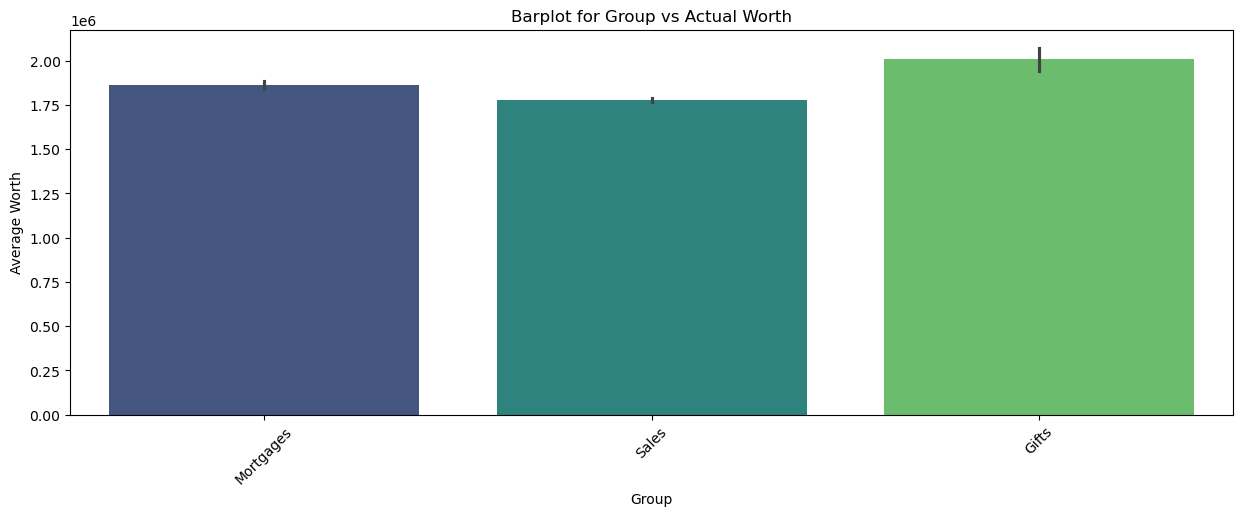

In [143]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'trans_group_en' , y='actual_worth', data=df, palette='viridis')
plt.title(f'Barplot for Transaction Group vs Actual Worth')
plt.xlabel('Transaction Group')
plt.ylabel('Average Worth')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aneesa\AppData\Local\Temp\ipykernel_21832\3718665107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'trans_group_en' , y='meter_sale_price', data=df, palette='viridis')


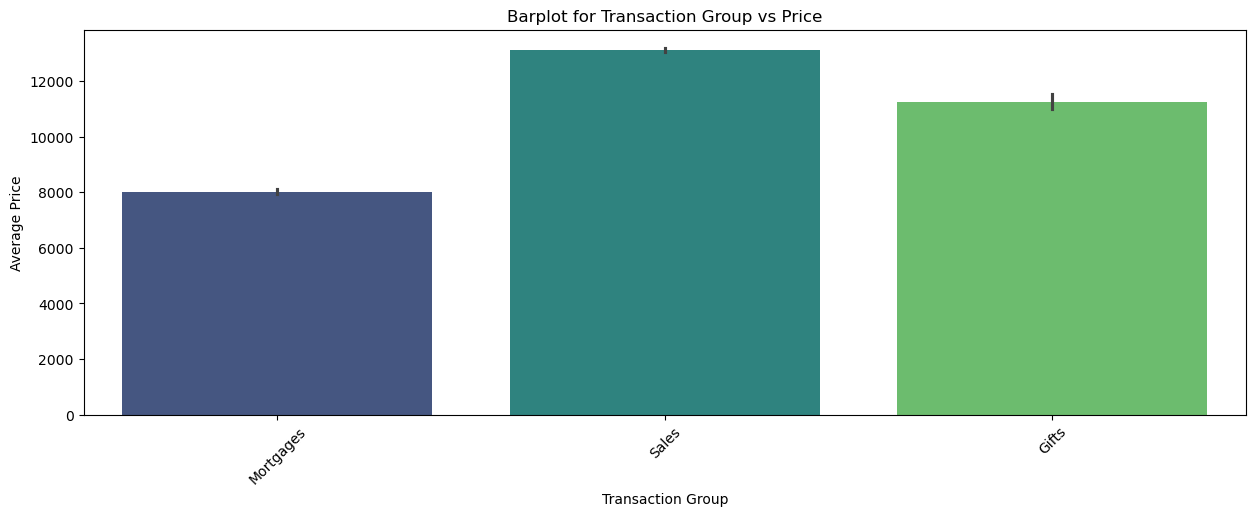

In [145]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'trans_group_en' , y='meter_sale_price', data=df, palette='viridis')
plt.title(f'Barplot for Transaction Group vs Price')
plt.xlabel('Transaction Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Convert categorical variables to numeric (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

In [43]:
# Define features and target
X = df.drop('actual_worth', axis=1)
y = df['actual_worth']

In [45]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X_scaled, y)


In [49]:
# Use a larger sample size if feasible
sample_size = 0.05  # Use 20% of the data
X_sampled, _, y_sampled, _ = train_test_split(X_selected, y, test_size=1 - sample_size, random_state=42)

In [51]:
# Split sampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)


In [53]:
# Define the SVR model
svr = SVR()

In [55]:
# Extended hyperparameter grid for better tuning
param_distributions = {
    'kernel': ['linear', 'rbf', 'poly'],   # Include polynomial kernel
    'C': [0.1, 1, 10, 100, 1000],         # Wider range
    'epsilon': [0.1, 0.2, 0.5],           # Margin of tolerance
    'gamma': ['scale', 'auto'],           # Kernel coefficient
    'degree': [2, 3]                      # For polynomial kernel
}

In [57]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_distributions,
    n_iter=15,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1,  # Utilize all available cores
    random_state=42
)

In [59]:
# Fit the model on training data
print("Starting RandomizedSearchCV...")
random_search.fit(X_train, y_train)

Starting RandomizedSearchCV...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [2, 3],
                                        'epsilon': [0.1, 0.2, 0.5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='r2', verbose=1)

In [60]:
# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

In [63]:
# Make predictions
y_pred = best_model.predict(X_test)


In [65]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("\nSupport Vector Regressor (SVR) Evaluation:")
print(f"R-Squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Best Parameters: {best_params}")


Support Vector Regressor (SVR) Evaluation:
R-Squared: 0.61
Mean Absolute Error (MAE): 567974.86
Root Mean Squared Error (RMSE): 867442.66
Best Parameters: {'kernel': 'linear', 'gamma': 'auto', 'epsilon': 0.5, 'degree': 2, 'C': 1000}


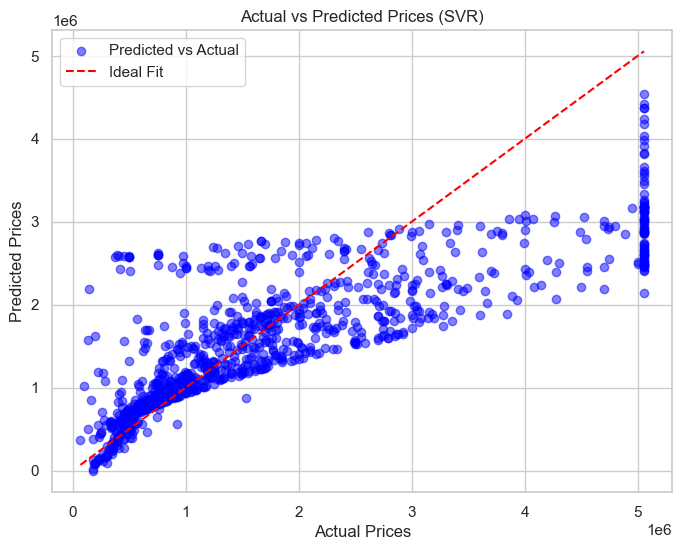

In [175]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red', label='Ideal Fit')

# Labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (SVR)")
plt.legend()
plt.show()

In [69]:
# -------- Random Forest Implementation --------
# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)


In [71]:
# Hyperparameter grid for Random Forest
rf_param_distributions = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [10, 20, None],          # Maximum tree depth
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required at each leaf
    'bootstrap': [True, False]            # Whether to bootstrap samples
}

In [73]:
# Perform RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_distributions,
    n_iter=10,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1,  # Utilize all available cores
    random_state=42
)

In [75]:
# Fit the model on training data
print("Starting RandomizedSearchCV for Random Forest...")
rf_random_search.fit(X_train, y_train)

Starting RandomizedSearchCV for Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='r2', verbose=1)

In [77]:
# Fit the model on training data
print("Starting RandomizedSearchCV for Random Forest...")
rf_random_search.fit(X_train, y_train)

Starting RandomizedSearchCV for Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='r2', verbose=1)

In [78]:
# Get the best Random Forest model and parameters
best_rf_model = rf_random_search.best_estimator_
best_rf_params = rf_random_search.best_params_

In [81]:
# Make predictions using the optimized Random Forest model
rf_predictions = best_rf_model.predict(X_test)

In [83]:
# Evaluation metrics for Random Forest
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print("\nRandom Forest Regressor Evaluation:")
print(f"R-Squared: {rf_r2:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"Best Parameters: {best_rf_params}")


Random Forest Regressor Evaluation:
R-Squared: 0.90
Mean Absolute Error (MAE): 153405.97
Root Mean Squared Error (RMSE): 438533.85
Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}


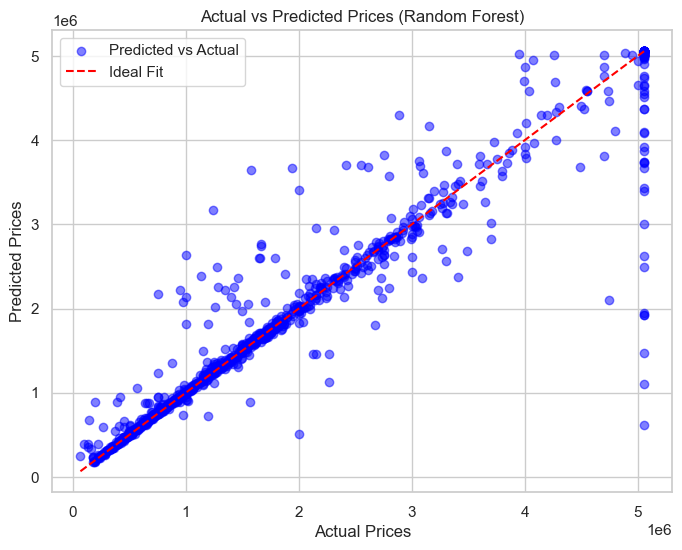

In [173]:
# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='red', label='Ideal Fit')

# Labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.legend()
plt.show()


In [87]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
# Define the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)


In [91]:
# Hyperparameter grid for Gradient Boosting Regressor
gbr_param_distributions = {
    'n_estimators': [50, 100, 200],           # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage
    'max_depth': [3, 5, 7],                  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples at each leaf
    'subsample': [0.8, 1.0]                  # Fraction of samples used for fitting each base learner
}

In [93]:
# Perform RandomizedSearchCV for Gradient Boosting
gbr_random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=gbr_param_distributions,
    n_iter=10,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1,  # Utilize all available cores
    random_state=42
)

In [95]:
# Fit the model on training data
print("Starting RandomizedSearchCV for Gradient Boosting Regressor...")
gbr_random_search.fit(X_train, y_train)

Starting RandomizedSearchCV for Gradient Boosting Regressor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [97]:
# Get the best Gradient Boosting Regressor model and parameters
best_gbr_model = gbr_random_search.best_estimator_
best_gbr_params = gbr_random_search.best_params_


In [99]:
# Make predictions using the optimized GBR model
gbr_predictions = best_gbr_model.predict(X_test)


In [101]:
# Evaluation metrics for GBR
gbr_r2 = r2_score(y_test, gbr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_predictions))

print("\nGradient Boosting Regressor (GBR) Evaluation:")
print(f"R-Squared: {gbr_r2:.5f}")  # Display R-squared with 5 decimal places
print(f"Mean Absolute Error (MAE): {gbr_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {gbr_rmse:.2f}")
print(f"Best Parameters: {best_gbr_params}")


Gradient Boosting Regressor (GBR) Evaluation:
R-Squared: 0.90342
Mean Absolute Error (MAE): 164829.77
Root Mean Squared Error (RMSE): 430563.38
Best Parameters: {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}


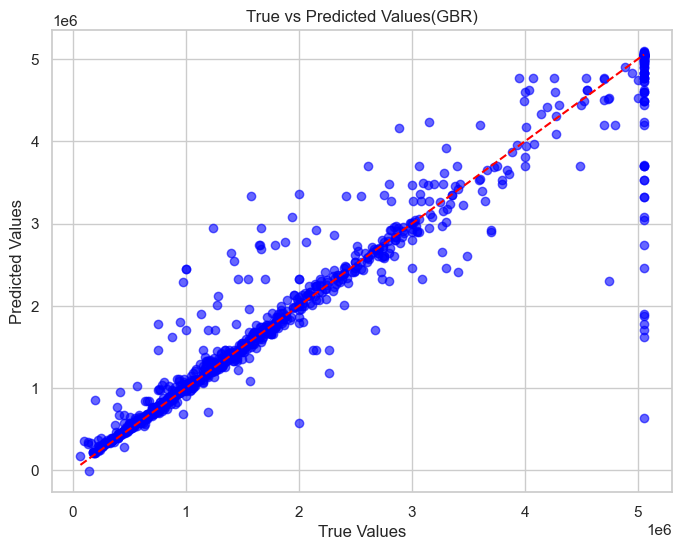

In [171]:
# Plot 2: True vs Predicted Values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, gbr_predictions, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed',label='Ideal Fit')
plt.title('True vs Predicted Values(GBR)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


In [107]:
import xgboost as xgb
from xgboost import XGBRegressor

In [109]:
# Define the XGBoost Regressor
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

In [111]:
# Hyperparameter grid for XGBoost
xgb_param_distributions = {
    'n_estimators': [50, 100, 200],            # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],        # Step size shrinkage
    'max_depth': [3, 5, 7],                   # Maximum tree depth
    'subsample': [0.8, 1.0],                  # Fraction of samples used for training
    'colsample_bytree': [0.8, 1.0],           # Fraction of features used per tree
    'min_child_weight': [1, 2, 5],            # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.5],                   # Minimum loss reduction required to split
    'reg_alpha': [0, 0.1, 0.5],               # L1 regularization term
    'reg_lambda': [1, 1.5, 2]                 # L2 regularization term
}

In [113]:
# Perform RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_distributions,
    n_iter=10,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1,  # Utilize all available cores
    random_state=42
)

In [115]:
# Fit the model on training data
print("Starting RandomizedSearchCV for XGBoost Regressor...")
xgb_random_search.fit(X_train, y_train)

Starting RandomizedSearchCV for XGBoost Regressor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 2, 5],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [117]:
# Get the best XGBoost model and parameters
best_xgb_model = xgb_random_search.best_estimator_
best_xgb_params = xgb_random_search.best_params_

In [119]:
# Make predictions using the optimized XGBoost model
xgb_predictions = best_xgb_model.predict(X_test)

In [121]:
# Evaluation metrics for XGBoost
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

print("\nXGBoost Regressor Evaluation:")
print(f"R-Squared: {xgb_r2:.5f}")
print(f"Mean Absolute Error (MAE): {xgb_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse:.2f}")
print(f"Best Parameters: {best_xgb_params}")


XGBoost Regressor Evaluation:
R-Squared: 0.90003
Mean Absolute Error (MAE): 153571.37
Root Mean Squared Error (RMSE): 438073.09
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}


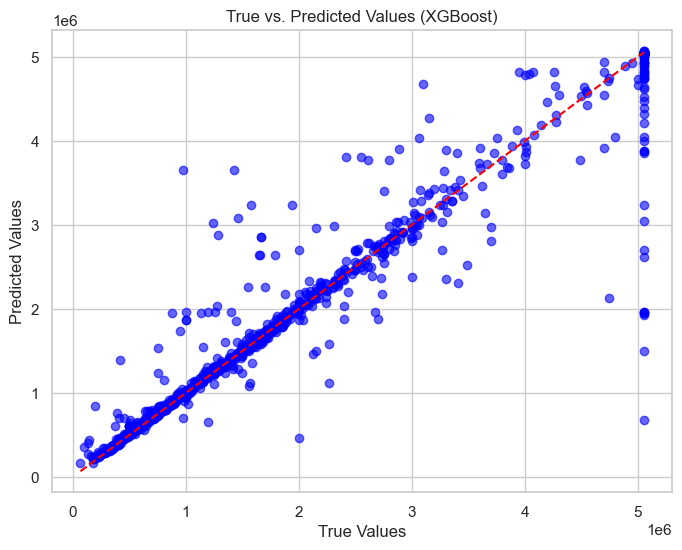

In [123]:
# Plot 2: True vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_predictions, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('True vs. Predicted Values (XGBoost)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [125]:
from sklearn.linear_model import Ridge, Lasso

In [127]:
# Define the hyperparameter grid for Ridge
ridge_param_distributions = {
    'alpha': np.logspace(-4, 4, 50)  # Regularization strength
}

In [129]:
# Define the Ridge model
ridge_model = Ridge(random_state=42)


In [131]:
# Perform RandomizedSearchCV for Ridge
ridge_random_search = RandomizedSearchCV(
    estimator=ridge_model,
    param_distributions=ridge_param_distributions,
    n_iter=10,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1,  # Utilize all available cores
    random_state=42
)

In [133]:
print("Starting RandomizedSearchCV for Ridge Regression...")
ridge_random_search.fit(X_train, y_train)

Starting RandomizedSearchCV for Ridge Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
                   random_state=42, scoring='r2', verbose=1)

In [135]:
# Get the best Ridge model and parameters
best_ridge_model = ridge_random_search.best_estimator_
best_ridge_params = ridge_random_search.best_params_

In [137]:
# Make predictions using the optimized Ridge model
ridge_predictions = best_ridge_model.predict(X_test)


In [139]:
# Evaluation metrics for Ridge
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print("\nRidge Regression Evaluation:")
print(f"R-Squared: {ridge_r2:.5f}")
print(f"Mean Absolute Error (MAE): {ridge_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {ridge_rmse:.2f}")
print(f"Best Parameters: {best_ridge_params}")


Ridge Regression Evaluation:
R-Squared: 0.75316
Mean Absolute Error (MAE): 466908.21
Root Mean Squared Error (RMSE): 688346.89
Best Parameters: {'alpha': 1.7575106248547894}


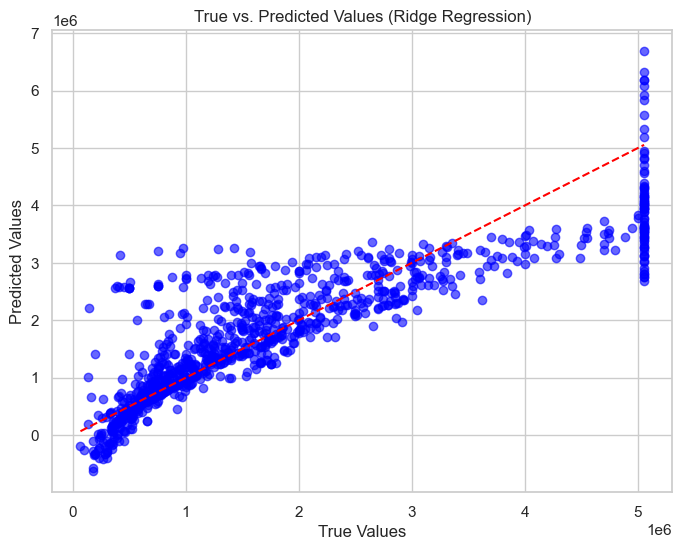

In [141]:
#Plot 2: True vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_predictions, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('True vs. Predicted Values (Ridge Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [143]:
# Define the hyperparameter grid for Lasso
lasso_param_distributions = {
    'alpha': np.logspace(-4, 4, 50)  # Regularization strength
}

In [145]:
# Define the Lasso model
lasso_model = Lasso(random_state=42)

In [147]:
# Perform RandomizedSearchCV for Lasso
lasso_random_search = RandomizedSearchCV(
    estimator=lasso_model,
    param_distributions=lasso_param_distributions,
    n_iter=10,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1,  # Utilize all available cores
    random_state=42
)

In [149]:
print("\nStarting RandomizedSearchCV for Lasso Regression...")
lasso_random_search.fit(X_train, y_train)


Starting RandomizedSearchCV for Lasso Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
                   random_state=42, scoring='r2', verbose=1)

In [151]:
# Get the best Lasso model and parameters
best_lasso_model = lasso_random_search.best_estimator_
best_lasso_params = lasso_random_search.best_params_


In [153]:
# Make predictions using the optimized Lasso model
lasso_predictions = best_lasso_model.predict(X_test)

In [155]:
# Evaluation metrics for Lasso
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

print("\nLasso Regression Evaluation:")
print(f"R-Squared: {lasso_r2:.5f}")
print(f"Mean Absolute Error (MAE): {lasso_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lasso_rmse:.2f}")
print(f"Best Parameters: {best_lasso_params}")


Lasso Regression Evaluation:
R-Squared: 0.75315
Mean Absolute Error (MAE): 467099.19
Root Mean Squared Error (RMSE): 688364.59
Best Parameters: {'alpha': 0.013257113655901081}


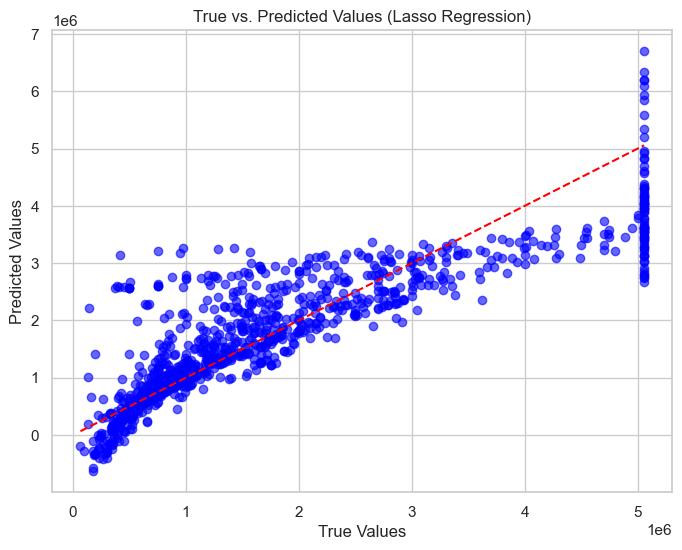

In [157]:
# Plot 2: True vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_predictions, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('True vs. Predicted Values (Lasso Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [159]:
# Placeholder for metrics of different models
metrics = {
    "Model": ["Support Vector Regressor (SVR)", "Random Forest (RF)", "Gradient Boosting Regressor (GBR)", 
              "XGBoost Regressor (XGB)", "Ridge Regression", "Lasso Regression"],
    "R-Squared": [r2, rf_r2, gbr_r2, xgb_r2, ridge_r2, lasso_r2],
    "RMSE": [rmse, rf_rmse, gbr_rmse, xgb_rmse, ridge_rmse, lasso_rmse],
    "MAE": [mae, rf_mae, gbr_mae, xgb_mae, ridge_mae, lasso_mae]
}

In [161]:
# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

In [163]:
# Print the DataFrame as a table
print(metrics_df)


                               Model  R-Squared           RMSE            MAE
0     Support Vector Regressor (SVR)   0.608007  867442.661053  567974.863084
1                 Random Forest (RF)   0.899815  438533.852730  153405.969861
2  Gradient Boosting Regressor (GBR)   0.903424  430563.383624  164829.770647
3            XGBoost Regressor (XGB)   0.900025  438073.089860  153571.368843
4                   Ridge Regression   0.753162  688346.886731  466908.205486
5                   Lasso Regression   0.753150  688364.592799  467099.192273
